In [17]:
import pandas as pd
from sklearn.datasets import load_iris


In [19]:
iris_df = pd.read_csv("Iris.csv")

In [21]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [16]:
iris_df.shape

(150, 6)

In [89]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [101]:
iris_df.columns = iris_df.columns.str.strip()

In [125]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [127]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [129]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [137]:
iris_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

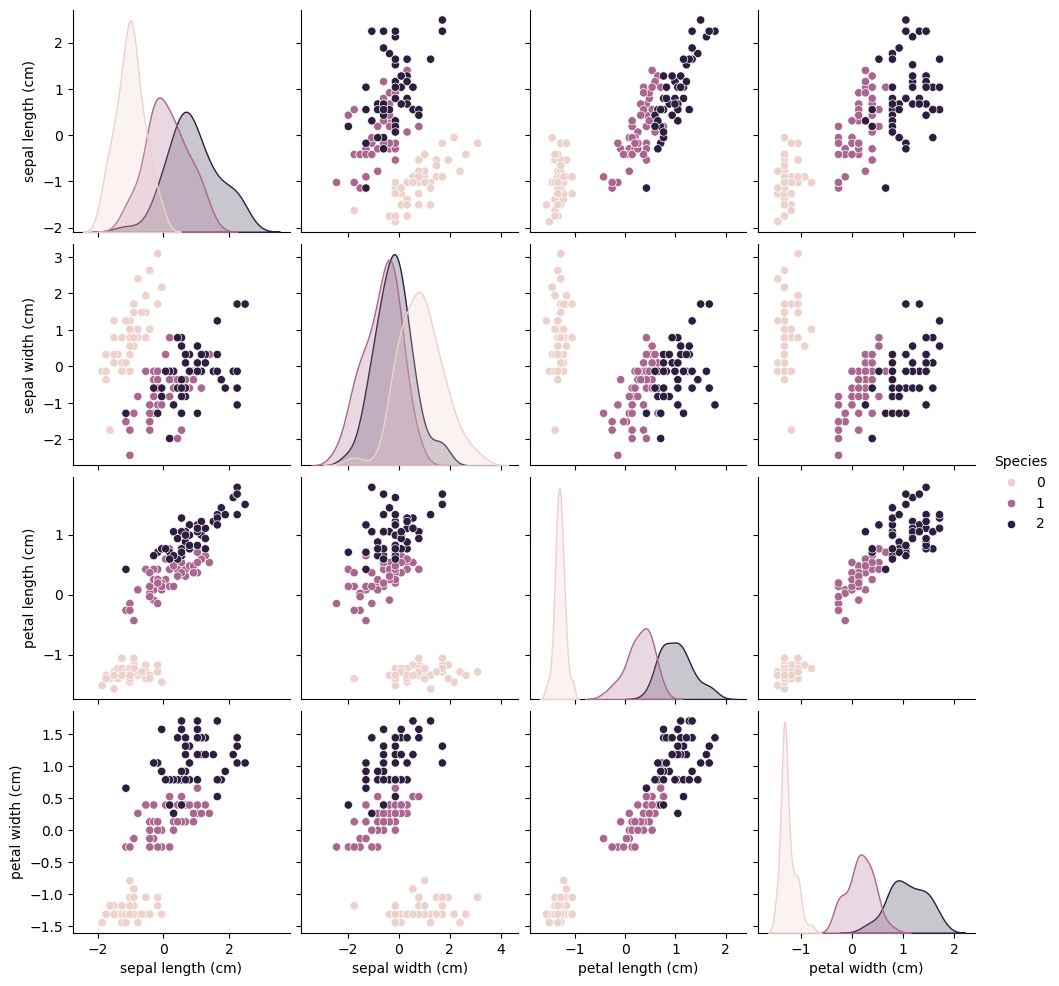

In [91]:
# To visualized the dataset

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(iris_df, hue= 'Species')
plt.show()
            

<function matplotlib.pyplot.show(close=None, block=None)>

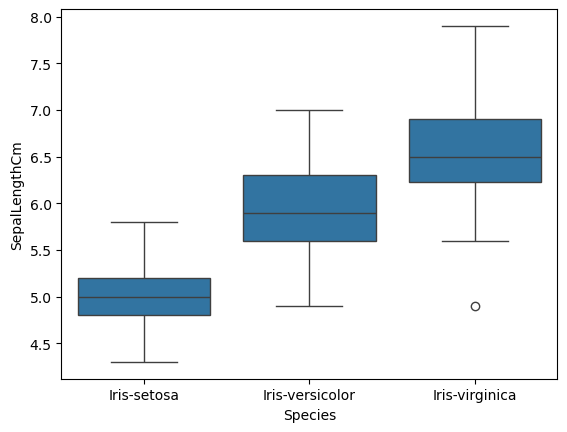

In [27]:
# To visualized the distribution of each features for each species
sns.boxplot(x='Species', y='SepalLengthCm', data= iris_df)
plt.show

In [93]:
# convert target variables species into numeric labels

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

iris_df['Species'] = le.fit_transform(iris_df['Species'])

In [27]:
# Create a DataFrame from the dataset
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data , columns = iris.feature_names)

In [29]:
# Standardize the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_df[iris.feature_names] = scaler.fit_transform(iris_df[iris.feature_names])

In [31]:
iris_df['Species'] = iris.target 

In [33]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X = iris_df[iris.feature_names]
y = iris_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X.head())
print(y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [34]:
X = iris_df[iris.feature_names]
y = iris_df['Species']


In [37]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the model

model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make prediction on the test set
y_pred = model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00
